# Ridge maps app

Exploratory code for a streamlit app that allows users to create [ridge maps](https://pypi.org/project/ridge-map/).

Users can draw an area on an interactive map using [leafmap](https://leafmap.org/). They cano customise their designs in terms of line density, colours, titles and download as images for print.

In [176]:
#import leafmap
import folium
from folium.plugins import Draw

import geopandas as gpd
from shapely.geometry import Polygon

#import matplotlib
import matplotlib.pyplot as plt
from ridge_map import RidgeMap

## Select coordinates

In [188]:
m = folium.Map(width=800, height=450)
Draw(draw_options={
                "polyline": False,
                "rectangle": True,
                "circle": False,
                "circlemarker": False,
                "marker":False,
                "polygon":False
            }).add_to(m)
m

In [2]:
# Interactive map for selection
m = leafmap.Map(layers_control=False, 
                measure_control=False, 
                attribution_control=False,
               fullscreen_control=False,
               toolbar_control=False,
               height="450px", width="800px")
m

Map(center=[20, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text…

In [155]:
#get coordinates from rectangle drawn on map
bl = []
tr = []

if len(m.draw_features) == 1:
    if m.draw_features[0]['geometry']["type"] == "Polygon":
        
        #store coordinates to use in ridge map
        bl = m.draw_features[0]['geometry']['coordinates'][0][0]
        tr = m.draw_features[0]['geometry']['coordinates'][0][2]
        
        #convert into geo dataframe to calculate rectangle area size
        poly = Polygon([tuple(p) for p in m.draw_features[0]['geometry']['coordinates'][0]])
        rect = gpd.GeoDataFrame(index=[0],crs = 'EPSG:4326', geometry=[poly]).to_crs("EPSG:6933")
        rect_size = rect.area.astype(int)/1000000 #get size in square km

In [157]:
rect

,geometry
0,"POLYGON ((-670786.707 5433527.736, -670786.707..."


In [156]:
rect_size

0   -2147.483648
dtype: float64

## Make ridge map

In [129]:
from palettable.cartocolors.sequential import Mint_6_r

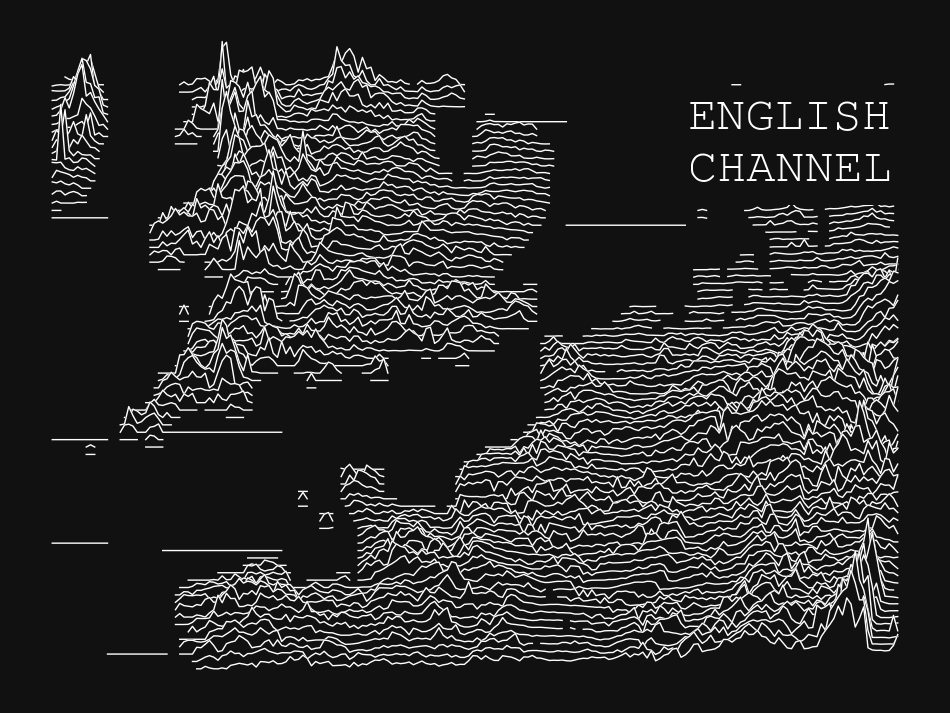

In [174]:
#===== USER INPUTS

#figure
_figsize = "rectangle"
_bgcolor = "#111111"

#elevation lines
_num_lines = 80
_elevation_pts = 200
_vertical_ratio = 80
_water_ntile = 2
_lake_flatness = 3
_linewidth = 1

#title
_title = 'English\nChannel'
_title_pos = "top right"
_title_fontsize = 35
_title_font = "Courier New"
_title_color = "white"

#define variable values depending on input
figsizedict = {"square": (12,12), "rectangle": (12,9)}
titleposdict = {"top left": [.16, .78, "left"], "top right":[.86, .78,  "right"], 
             "bottom left": [.16, .22, "left"], "bottom right":[.86, .22, "right"] }

#===== PLOT
#Setup figure
fig,ax = plt.subplots(figsize=figsizedict[_figsize])
fig.set_facecolor(bgcolor)

#elevation lines
rm = RidgeMap(bl + tr, font = "Ubuntu")
values = rm.get_elevation_data(num_lines=_num_lines, elevation_pts=_elevation_pts)
ridges = rm.plot_map(values=rm.preprocess(values=values, vertical_ratio=_vertical_ratio, 
                                          water_ntile=_water_ntile, lake_flatness=_lake_flatness), 
            kind='elevation',
            label=None,
            line_color = "white",
            #line_color = "Reds",
            background_color = _bgcolor,
            ax=ax,
            linewidth=_linewidth,
           )

#title
plt.figtext(titleposdict[_title_pos][0], titleposdict[_title_pos][1], _title.upper(), va='top', 
            ha=titleposdict[_title_pos][2],
            fontsize=_title_fontsize, color=_title_color, fontname=_title_font, linespacing=1.5,
            bbox=dict(facecolor=_bgcolor, linewidth=0, pad=10, alpha=1))

plt.savefig("english-channel.png", bbox_inches='tight', dpi=300, transparent=False, pad_inches=0)

plt.show()

In [115]:
import matplotlib.font_manager
from IPython.core.display import HTML

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 18px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

HTML("<div style='column-count: 2;'>{}</div>".format(code))

# Other

In [42]:
#turn polygon into dataframe to calculate size
poly = Polygon([tuple(p) for p in 
                m.draw_features[0]['geometry']['coordinates'][0]])
rect = gpd.GeoDataFrame(index=[0],crs = 'EPSG:4326', geometry=[poly])
rect = rect.to_crs("EPSG:6933") #convert to meters

rect.area.astype(int)/1000000

0    85.390153
dtype: float64

In [4]:
m.draw_features

[{'type': 'Feature',
  'properties': {},
  'geometry': {'type': 'Polygon',
   'coordinates': [[[-0.220024, 51.474883],
     [-0.220024, 51.537281],
     [-0.04287, 51.537281],
     [-0.04287, 51.474883],
     [-0.220024, 51.474883]]]}}]